# Chapter 7: kMeans

In [1]:
%reset
%matplotlib inline
low_memory=False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from scipy.stats import mode

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 7.1 Introduction & Motivation

In contrary to regression and classification, clustering is a bit more abstract. Instead of knowing what value we want to predict and what kind of values we can expect from it, we are now leaving all of that behind us and putting our trust in our created model. This time, we are passing our data and asking ourself the following question: within the given data, are there any **groups** or **clusters** of datapoints that belong together?

This kind of information might not seem as valueble as regression or classification at first glance, but is extremely useful in cases such as customer segmentation (so you know what your audience groups are and who to target), fraud detection (by identifying outliers who don't really fit in a cluster) or data organisations (such as grouping articles).

## 7.2 Problem Setting

In today's notebook we will be looking at two different datasets. First we will explore cluistering as segmentation mechanic using the mall customers dataset, after which we will try to mold it into a predictive model by revisiting the wine dataset.

The mall customers dataset contains data regarding, you guessed it, mall customers. Each customer has a certain gender, age, annual income (in k$) and a spending score between 0 and 100. We are trying to visulalize which groups of people have a similar spending power, so we can target our advertisements accordingly.

## 7.3 Model

As always, let's have a look at the data first.

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


##### Question 1: Try and plot a heatmap to further explore the data. If you run into any errors, fix it using a method we've seen before just like the previous exercise.

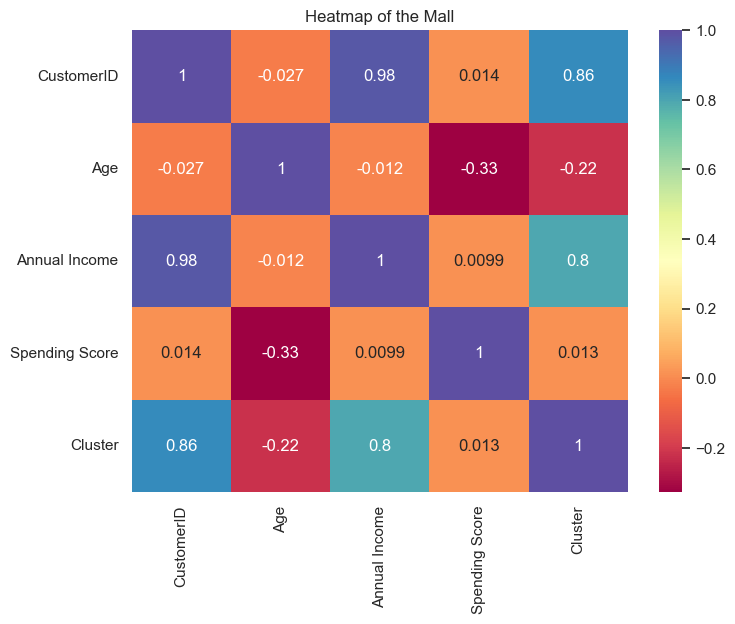

In [54]:
X = df.drop('Gender', axis=1)  
y = df['Gender']  

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='Spectral')
plt.title('Heatmap of the Mall')
plt.show()

##### Question 2: Do you notice any strange or unexpected relation? Can you think of why this is? Is it pure chance or is there more going on?

#### Age and Spending Score: 
If there's a weak or negative correlation between age and spending score, it could indicate that younger and older customers may have similar spending patterns, or that spending preferences don’t directly depend on age. This might be due to lifestyle choices where spending behaviors vary widely within age groups.

#### Annual Income and Spending Score:
Surprisingly, we might find that Annual Income does not have a strong positive correlation with Spending Score. Intuitively, one might expect higher income customers to have higher spending scores, but in many retail datasets, spending can depend more on psychological or demographic factors than income alone. For instance, some high-income individuals may prefer savings or invest elsewhere, while others might enjoy leisure spending regardless of income.

#### Age and Annual Income: 
Often, there's no clear correlation between Age and Annual Income in consumer data. While older individuals tend to have higher incomes due to career progression, various factors, such as retirement or early-career high earners, could make this relationship more complex.

## 7.4 Model Evaluation

##### Question 3: We will be trying to visualize our data. Since a simple to understand 2D plot can only support two variables (a dependant and an independant one) we are forced to limit our model to two variables. Our dependant variable will be Spending Score as that is what we are trying to visualize. Pick an independant variable and figure out the best value for k.

C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

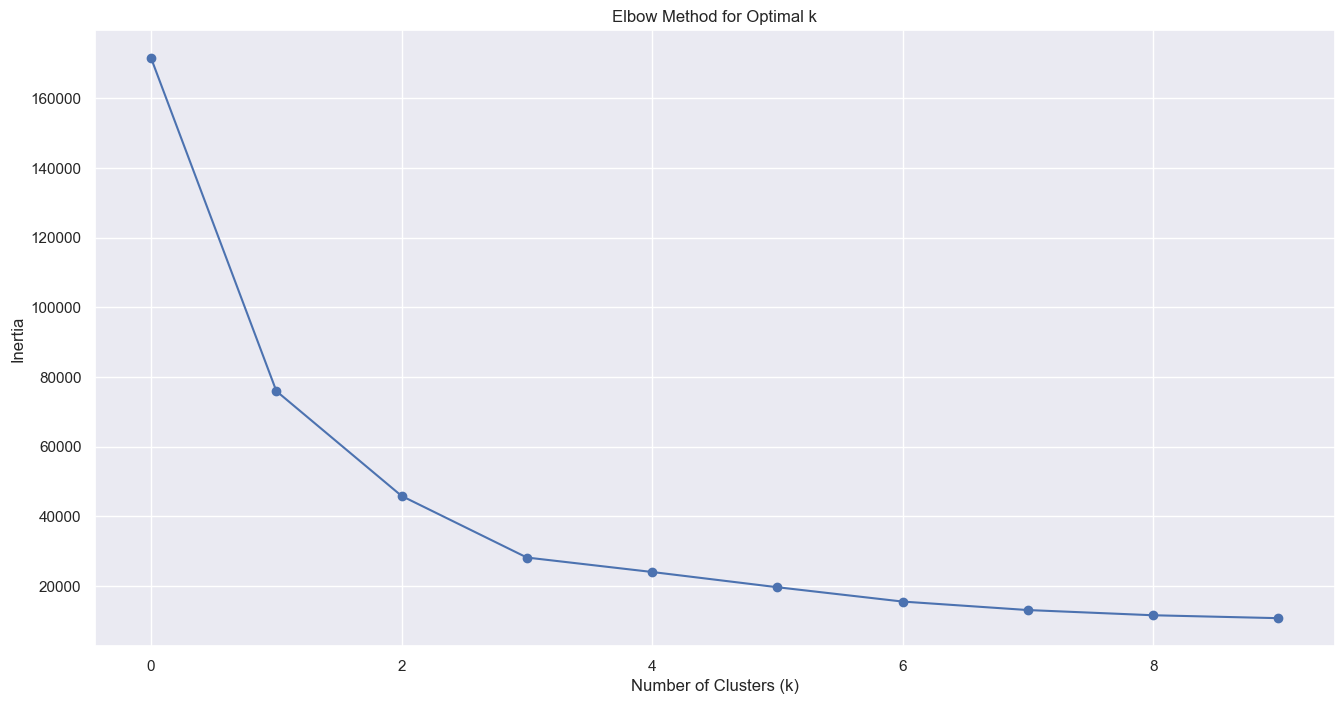

In [4]:
X=df[['Age','Spending Score']]

inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X) # classtring fit predict together ,bcz no need to train 
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot( inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


##### Question 4: Plot a graph showing the Spending Score in function of the column you picked. Make sure you can visualize each individual cluster and its centroids.

C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


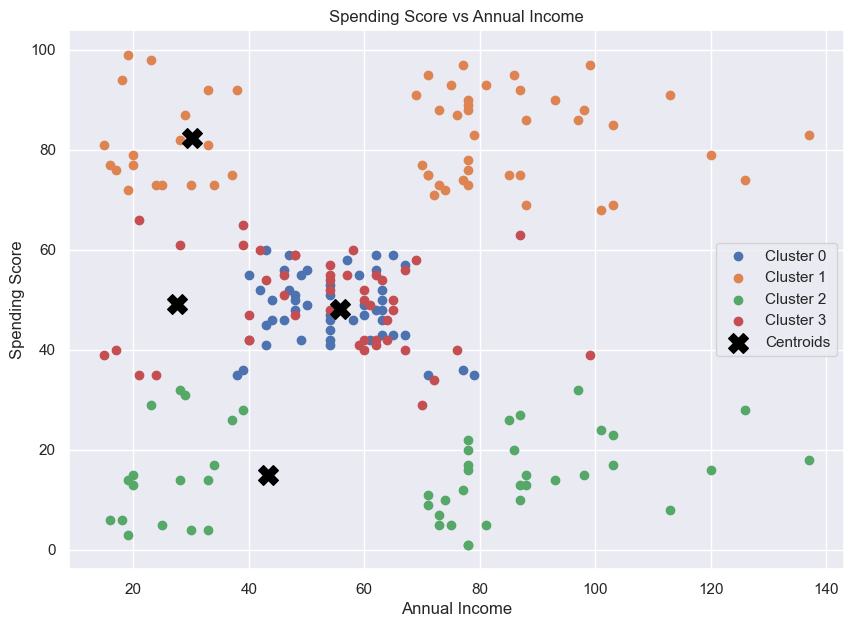

In [5]:
# kmeans = KMeans(n_clusters=4, random_state=0)
# clusters = kmeans.fit_predict(X)
# centers = kmeans.cluster_centers_ 
# plt.figure(figsize=(8, 6))
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='.', edgecolor='k', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='green', marker='*', s=200, linewidths=3, label='Centroids')
# plt.title('KMeans Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.show()

optimal_k = 4  # Example value; replace this with the optimal k you found
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {cluster}')
    
    

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Label the plot
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


##### Question 5: You've explored the relation of one column with Spending Score, now explore all other columns. Are there any more insights to be revealed?

C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cluster assignments:
      CustomerID  Gender  Age  Annual Income  Cluster
0             1       1   19             15        0
1             2       1   21             15        0
2             3       0   20             16        0
3             4       0   23             16        0
4             5       0   31             17        0
..          ...     ...  ...            ...      ...
195         196       0   35            120        1
196         197       0   45            126        1
197         198       1   32            126        1
198         199       1   32            137        1
199         200       1   30            137        1

[200 rows x 5 columns]


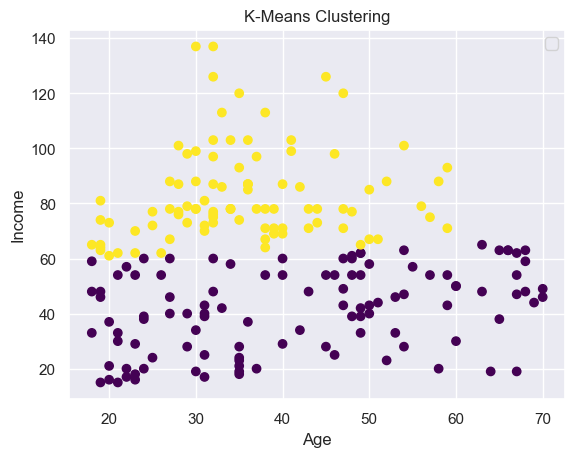

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
X = df[['Gender', 'Age','Annual Income']]
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("Cluster assignments:\n", df[['CustomerID','Gender', 'Age', 'Annual Income' ,'Cluster']])

plt.scatter(df['Age'], df['Annual Income'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


##### Question 6: Based on this, does our preferred value in the correlation matrix for picking columns still hold up? What would you change?

## 7.5 Questions

##### Question 1: See section 7.3
##### Question 2: See section 7.3
##### Question 3: See section 7.4
##### Question 4: See section 7.4
##### Question 5: See section 7.4
##### Question 6: See section 7.4
##### Question 7: Revisit the old wine dataset. Copy it to your current folder and import it. Drop the Id column just like we did in the notebook on decision trees.

In [25]:
wine_data=pd.read_csv('Wine.csv')
wine_data=wine_data.drop(columns=['Id'])
wine_da.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


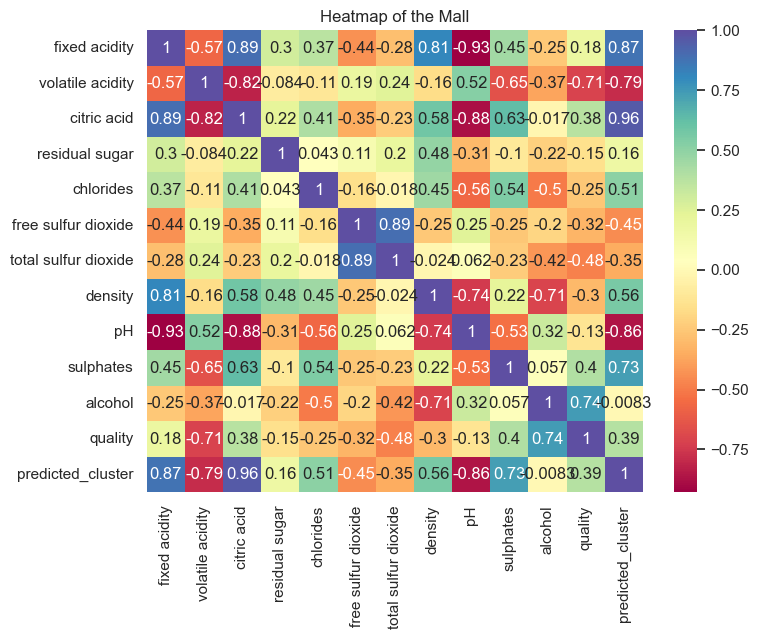

In [52]:
cm=wine_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm.corr(), annot=True, cmap='Spectral')
plt.title('Heatmap of the Mall')
plt.show()

##### Question 8: We want to explore the vizualization of quality as the dependant variable and all other variables. Calculate the best value of k for each graph (11 in total) and plot them. What can you learn from this?

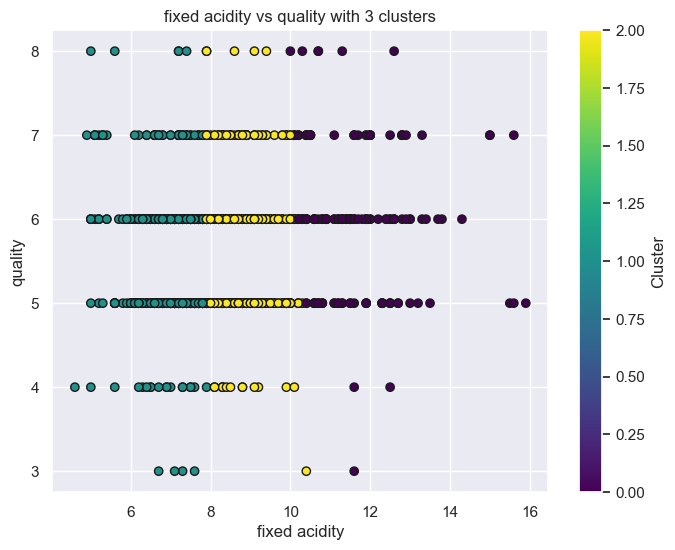

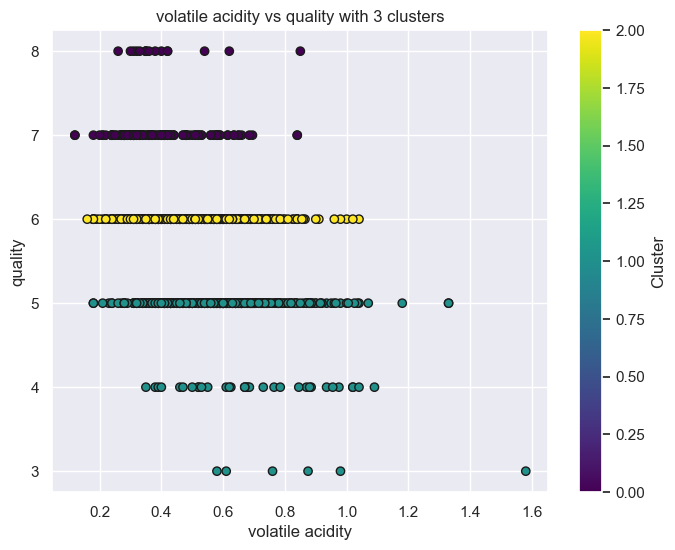

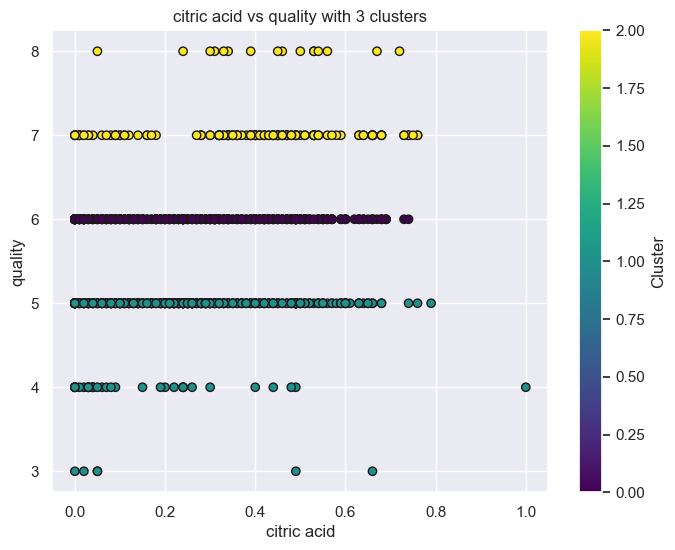

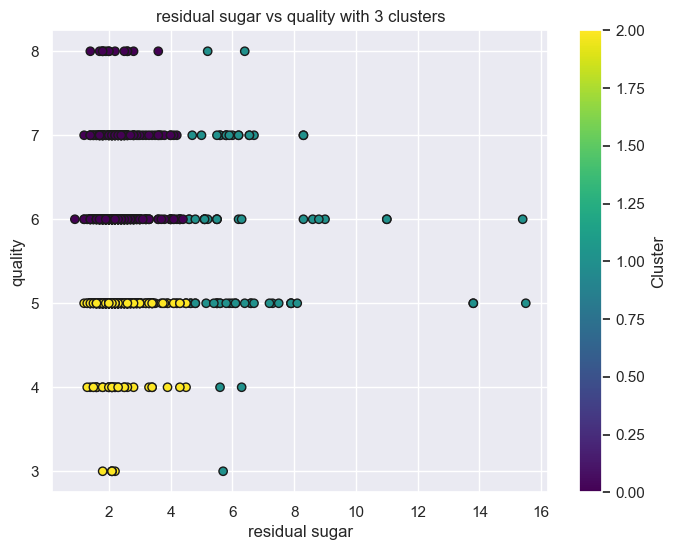

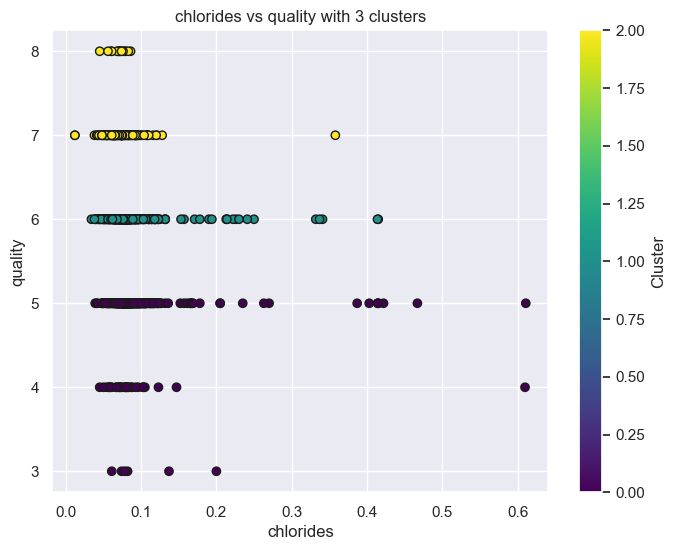

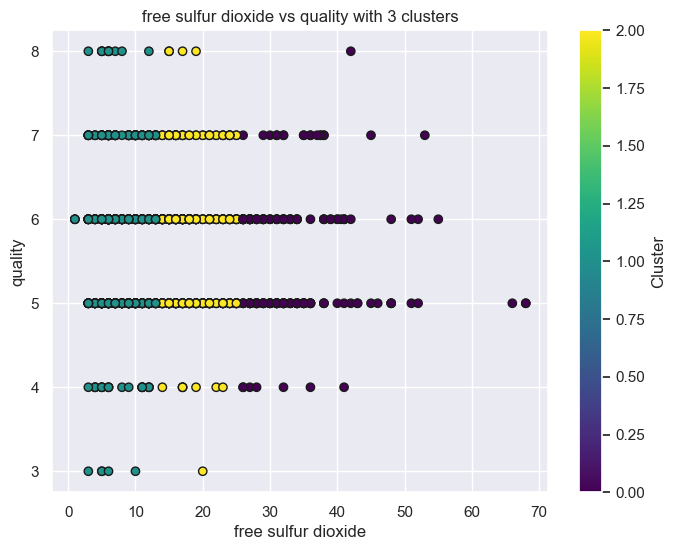

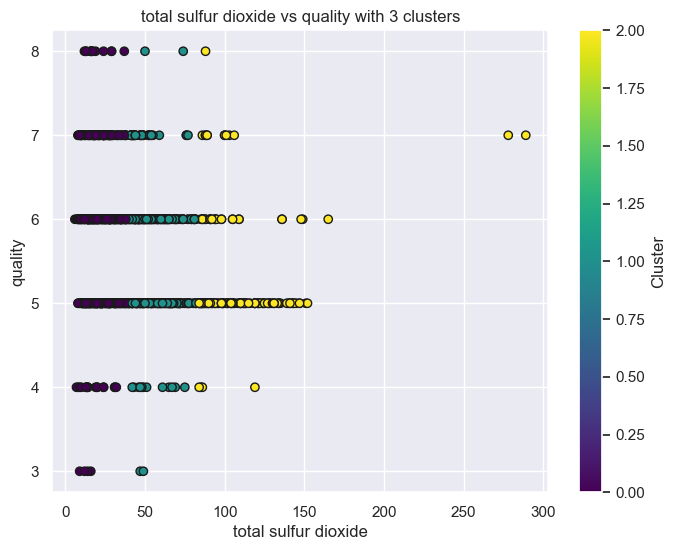

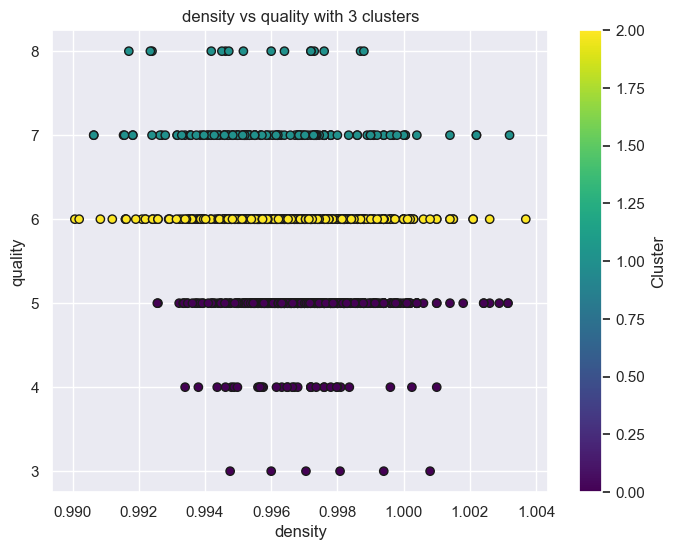

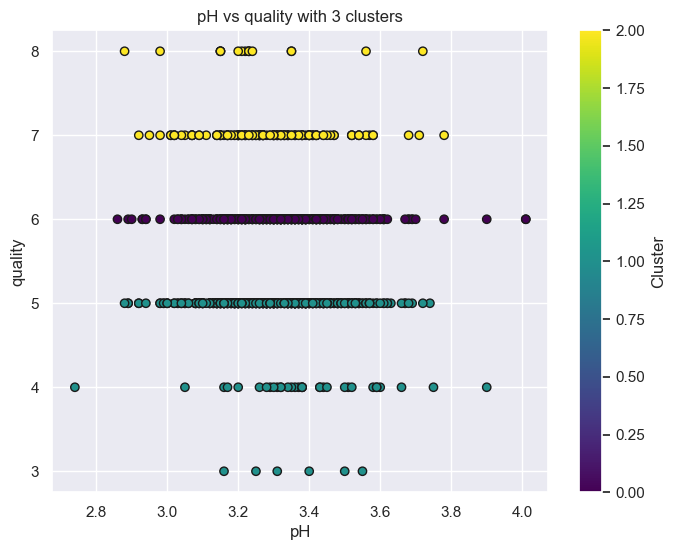

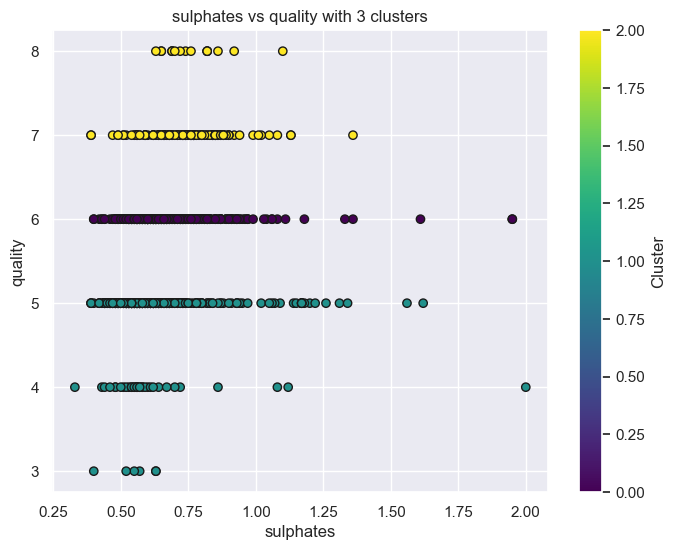

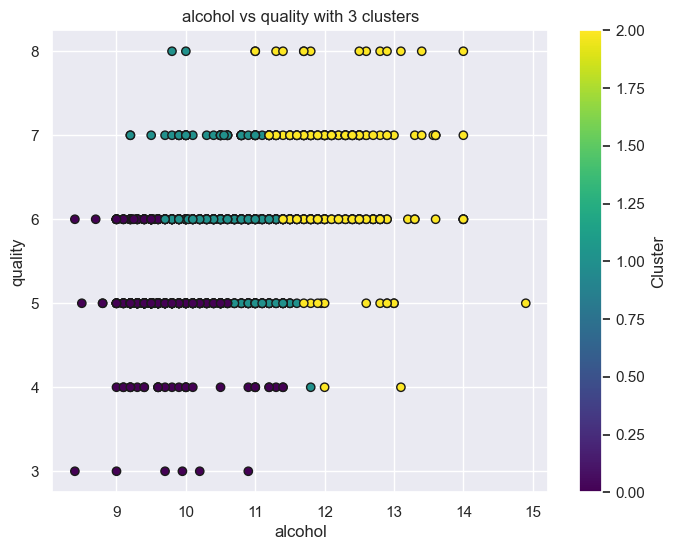

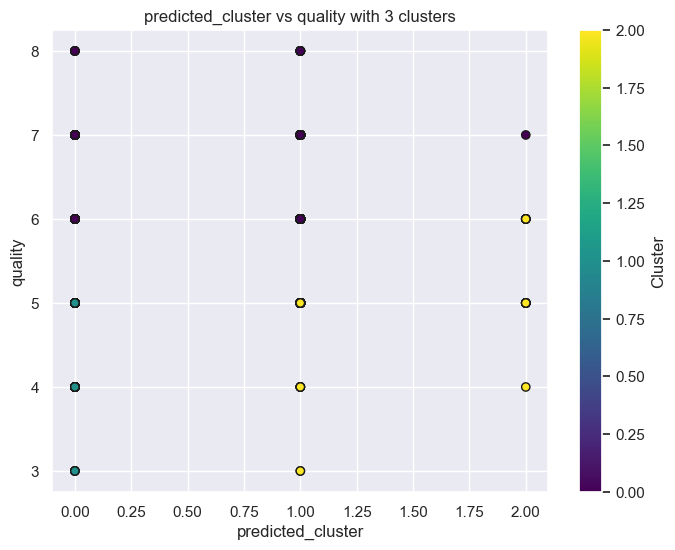

In [57]:
features = [col for col in wine_data.columns if col != 'quality']

def find_optimal_k(X):
    distortions=[]
    K=range(1,11)
    for k in K:
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    optimal_k=3
    return optimal_k

for feture in features:
    data=wine_data[[feture,'quality']]
    X=data.values
    optimal_k=find_optimal_k(X)
    kmeans=KMeans(n_clusters=optimal_k)
    clusters=kmeans.fit_predict(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(wine_data[feture], wine_data['quality'], c=clusters, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel(feture)
    plt.ylabel('quality')
    plt.title(f'{feture} vs quality with {optimal_k} clusters')
    plt.colorbar(label='Cluster')
    plt.show()

##### Question 9: Try and use clustering as a way to predict your quality. Feel free to use all columns for this model. Think of how many clusters you would expect in this case!

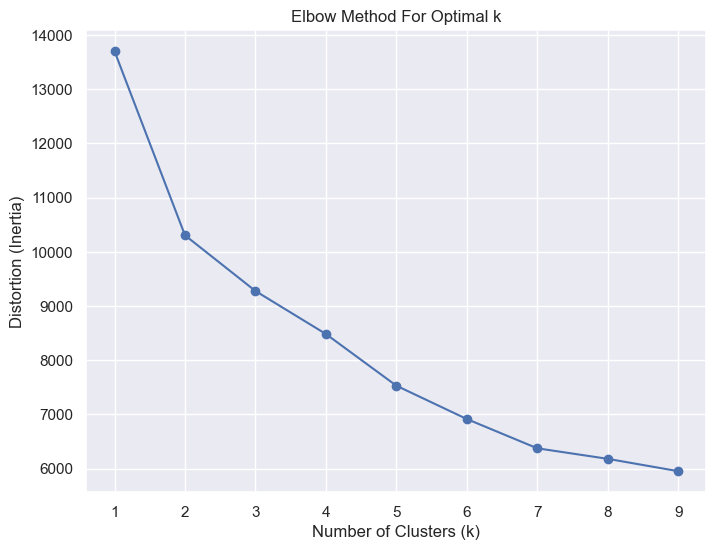

Cluster to Quality Mapping:
 predicted_cluster
0    5.490858
1    5.956311
2    5.421053
Name: quality, dtype: float64


In [43]:
from sklearn.preprocessing import StandardScaler
X=wine_data.drop(columns=['quality'])
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
distortions = []
K = range(1, 10)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

ptimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wine_data['predicted_cluster'] = kmeans.fit_predict(X_scaled)
cluster_quality_map = wine_data.groupby('predicted_cluster')['quality'].mean()
print("Cluster to Quality Mapping:\n", cluster_quality_map)

##### Question 10: Evaluate the model. Is it any good for this kind of prediction? Why is this? Are there any noteable differences when seen against predicting the digits dataset? What makes a dataset 'good' to use with clustering for predicting a value? Elaborate based on your findings from question 8 and 9.


<span style="color:green">
# 1. Model Evaluation for Predicting Quality
</span>    
Since we’re using clustering for prediction, our primary evaluation criteria focus on how well the clusters represent distinct quality groups. Key metrics to consider:

<span style="color:blue">
Silhouette Score:
</span> 
Measures how similar each point is to its assigned cluster compared to other clusters, indicating how distinct and cohesive clusters are.
<span style="color:green">
Adjusted Rand Index (ARI):
</span>  
Adjusted Rand Index (ARI):
Compares the predicted clusters with actual quality values to see if the clusters align well with the true labels.
Mean Quality per Cluster: By examining the average quality within each cluster, we can observe if clusters align with quality levels consistently.
In practice, clustering often struggles to precisely predict a continuous variable (like quality) because clustering is inherently an unsupervised approach and doesn’t aim to optimize based on a target variable. Clustering typically performs better in grouping similar data points without necessarily achieving precise prediction of a particular outcome.

2. Is Clustering Suitable for Predicting Quality?
Clustering is generally not ideal for directly predicting a continuous or ordinal target variable like quality:

Unsupervised Nature: Clustering algorithms do not have access to the actual quality values during training, which limits their ability to produce clusters that closely map to specific quality levels.
Loss of Precision: Clustering assigns data to distinct groups but doesn’t offer a way to fine-tune predictions to match the specific nuances within continuous quality levels.
High Variability in Features: If the features do not have strong, clear relationships with quality, clusters may not accurately represent differences in quality, leading to poor predictive accuracy.
3. Comparison with the Digits Dataset
The digits dataset, commonly used for clustering, is typically well-suited for this approach:

Distinct Clusters: Digits have natural groupings, as each digit class has unique characteristics that separate it from others, making clustering effective in distinguishing them.
Discrete Classes: Predicting digit labels is a classification problem, where clustering naturally excels, as it’s designed to group similar data points into discrete categories.
Homogeneous Feature Patterns: The features in the digits dataset (e.g., pixel intensities) are often highly informative for distinguishing between digits, leading to well-defined clusters with minimal overlap.
By contrast, the wine quality data is more challenging for clustering due to the lack of clear boundaries between quality levels and the continuous nature of the target.

4. Characteristics of a Dataset Well-Suited for Clustering-Based Prediction
A dataset is more likely to be suitable for clustering when it has:

Discrete and Distinct Categories: Clear, separate groups, like species in biological datasets or document topics in text datasets, can be well-represented through clustering.
Low Noise in Feature-Label Relationship: When features strongly correlate with specific groups or categories, clustering can naturally approximate the categories without requiring supervision.
Feature Homogeneity Within Clusters: If data points within each cluster exhibit similar feature values, clustering will yield more meaningful and distinct groups.
Findings from Questions 8 and 9
Based on the previous questions, here’s a summary of why clustering may struggle with predicting quality in this dataset:

Lack of Clear Clusters: Quality does not have natural, well-defined clusters. The overlap between feature values across quality levels means that clusters are not distinct enough to accurately represent each quality level.
Continuous Target Variable: Clustering is more effective for categorical targets. Quality, being ordinal or continuous, doesn’t lend itself to clean divisions based on clustering.
Conclusion
While clustering reveals patterns and potential groupings, it is limited in its ability to predict continuous values accurately. In contrast, datasets with discrete categories and strong feature-label relationships are better suited for clustering. Thus, for predicting quality, supervised methods like regression or classification models are typically more effective.